<a href="https://colab.research.google.com/github/gimelato/imersao_python_excel_analise_dados/blob/main/aula_4/imersao_python_aula4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Instalando e importando as bibliotecas necessárias

In [ ]:
!pip install mplfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 893.0 kB/s eta 0:00:00


In [ ]:
#importando os pacotes que utilizo no codigo
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import mplfinance as mpf
#importando o yahoo finance, a interface de onde os dados serão importados
import yfinance as yf
import plotly.graph_objects as go
from plotly.subplots import make_subplots

## Carregando um data frame e renomeando colunas

In [ ]:
#fazendo download das ações da Petrobrás no ano de 2023
dados = yf.download('PETR4.SA', start='2023-01-01', end='2023-12-31')
dados

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-02,23.540001,23.809999,22.799999,22.920000,17.709478,78424700
2023-01-03,22.940001,23.100000,22.129999,22.340000,17.261332,96750300
2023-01-04,21.959999,23.590000,21.830000,23.049999,17.809923,129504000
2023-01-05,23.340000,24.040001,23.150000,23.879999,18.451235,73886000
2023-01-06,23.940001,24.320000,23.549999,23.740000,18.343061,51851500
...,...,...,...,...,...,...
2023-12-21,36.669998,36.680000,36.070000,36.389999,36.389999,30511900
2023-12-22,36.500000,36.799999,36.369999,36.740002,36.740002,31234700
2023-12-26,36.860001,37.369999,36.830002,37.330002,37.330002,23466800


In [ ]:
#renomeando as colunas para portugues

dados.columns = ['abertura', 'maximo', 'minimo', 'fechamento', 'fechamento_ajs', 'volume']

In [ ]:
dados = dados.rename_axis('data')
dados

,abertura,maximo,minimo,fechamento,fechamento_ajs,volume
data,,,,,,
2023-01-02,23.540001,23.809999,22.799999,22.920000,17.709478,78424700
2023-01-03,22.940001,23.100000,22.129999,22.340000,17.261332,96750300
2023-01-04,21.959999,23.590000,21.830000,23.049999,17.809923,129504000
2023-01-05,23.340000,24.040001,23.150000,23.879999,18.451235,73886000
2023-01-06,23.940001,24.320000,23.549999,23.740000,18.343061,51851500
...,...,...,...,...,...,...
2023-12-21,36.669998,36.680000,36.070000,36.389999,36.389999,30511900
2023-12-22,36.500000,36.799999,36.369999,36.740002,36.740002,31234700
2023-12-26,36.860001,37.369999,36.830002,37.330002,37.330002,23466800


## fazendo gráficos

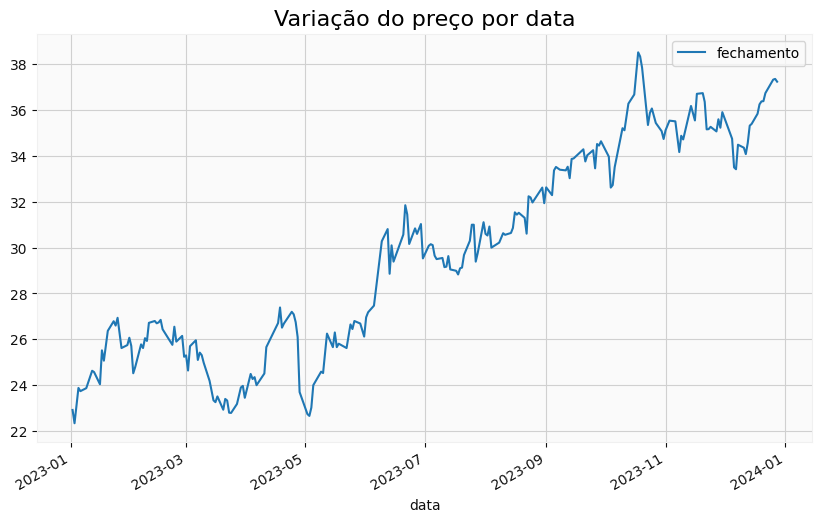

In [ ]:
#primeiro um gráfico simples usando o pandas e matplotlib
#indicando a coluna de interesse e dando um tamanho para a figura
dados['fechamento'].plot(figsize = (10,6))
#dando um título pro gráfico
plt.title('Variação do preço por data', fontsize=16)
#legenda da linha
plt.legend(['fechamento'])

Fazendo gráficos candlesticks

<img src="https://gorila.com.br/blog/_next/image?url=https%3A%2F%2Fgorila.com.br%2Fwp-content%2Fuploads%2Fanalise-grafica-candlestick-1-1024x977.png&w=3840&q=75" width="450" height="400">

In [ ]:
#preparando a base

# selecionando apenas os 60 primeiros dias
df = dados.head(60).copy()

# como o índice são as datas, criando uma coluna 'data' com os mesmos valores do índice
df['data'] = df.index

# Convertendo as datas para o formato numérico de matplotlib
# Isso é necessário para que o Matplotlib possa plotar as datas corretamente no gráfico
#o mdates é um método do matplot para manipulação de datas, neste caso o 'date to num' transforma a data num número
df['data'] = df['data'].apply(mdates.date2num)

df.head()

,abertura,maximo,minimo,fechamento,fechamento_ajs,volume,data
data,,,,,,,
2023-01-02,23.540001,23.809999,22.799999,22.920000,17.709478,78424700,19359.0
2023-01-03,22.940001,23.100000,22.129999,22.340000,17.261332,96750300,19360.0
2023-01-04,21.959999,23.590000,21.830000,23.049999,17.809923,129504000,19361.0
2023-01-05,23.340000,24.040001,23.150000,23.879999,18.451235,73886000,19362.0
2023-01-06,23.940001,24.320000,23.549999,23.740000,18.343061,51851500,19363.0


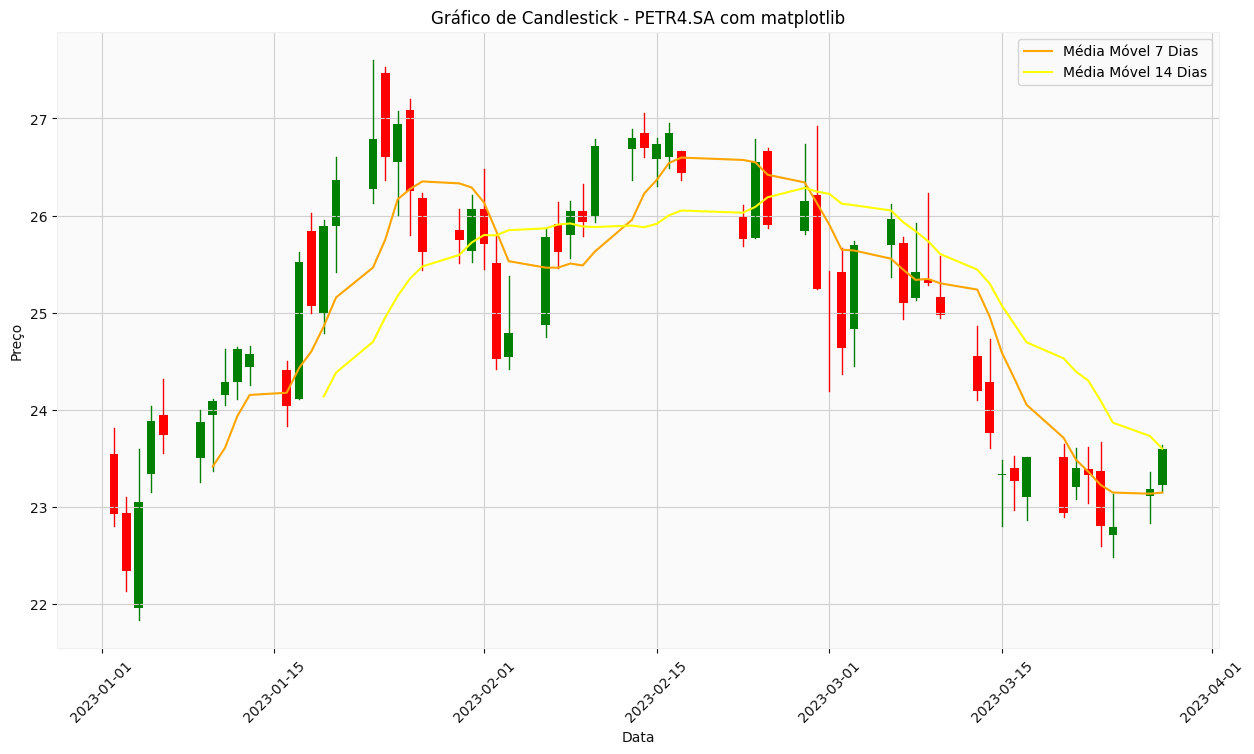

In [ ]:
#criando o espaço onde o gráfico será plotado e definindo o tamanho no figsize (largura,altura)
fig, ax = plt.subplots(figsize=(15, 8))

# criando um objeto para a largura dos candles no gráfico
width = 0.7

#criando um loop para fazer as velas de cada data
for i in range(len(df)):
    # Determinando a cor do candle
    # Se o preço de fechamento for maior que o de abertura, o candle é verde (a ação valorizou nesse dia).
    # Se for menor, o candle é vermelho (a ação desvalorizou).
    if df['fechamento'].iloc[i] > df['abertura'].iloc[i]:
        color = 'green'
    else:
        color = 'red'

    # Desenhando a linha vertical do candle (mecha)
    # Essa linha mostra os preços máximo (topo da linha) e mínimo (base da linha) do dia.
    # Usamos `ax.plot` para desenhar uma linha vertical.
    ax.plot([df['data'].iloc[i], df['data'].iloc[i]],
            [df['minimo'].iloc[i], df['maximo'].iloc[i]],
            color=color,
            linewidth=1)
    # Desenhando o retangulo com abertura e fechamento do dia
    # o add_patch adiciona um objeto
    # df['Data'].iloc[i]] define o ponto x da linha (a data), quando subtraido da largura do candlestick sobre 2 esse retangulo será desenhado no meio da data
    # min([df['Mínimo'].iloc[i], df['Máximo'].iloc[i]]) define a altura do candle selecionando o menor valor dentre os dois
    # abs(df['Fechamento'].iloc[i] - df['Abertura'].iloc[i]) indica a altura que terá o retangulo dando a diferença absoluta entre a abertura e fechamento
    ax.add_patch(plt.Rectangle((df['data'].iloc[i] - width/2, min(df['abertura'].iloc[i], df['fechamento'].iloc[i])),
                               width,
                               abs(df['fechamento'].iloc[i] - df['abertura'].iloc[i]),
                               facecolor=color))


#fazendo data frames com média móvel de 7 e de 14 dias rolando no data frame
#as medias moveis mostram uma tendencia daqueles dados. Neste caso, elas são calculadas sempre pelos ultimos dias (7 ou 14)
df['MA7'] = df['fechamento'].rolling(window=7).mean()
df['MA14'] = df['fechamento'].rolling(window=14).mean()

# Plotando as médias móveis
ax.plot(df['data'], df['MA7'], color='orange', label='Média Móvel 7 Dias')  # Média de 7 dias
ax.plot(df['data'], df['MA14'], color='yellow', label='Média Móvel 14 Dias')  # Média de 14 dias
# Adicionando legendas para as médias móveis
ax.legend()

# Formatando o eixo x para mostrar as datas
# Configuramos o formato da data e a rotação para melhor legibilidade
ax.xaxis_date() #O método xaxis_date() é usado para dizer ao Matplotlib que as datas estão sendo usadas no eixo x
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)

# Adicionando título e rótulos para os eixos x e y
plt.title("Gráfico de Candlestick - PETR4.SA com matplotlib")
plt.xlabel("Data")
plt.ylabel("Preço")

# Adicionando uma grade para facilitar a visualização dos valores
plt.grid(True)

# Exibindo o gráfico
plt.show()

In [ ]:
#fazendo data frames com média móvel de 7 e de 14 dias rolando no data frame
df['MA7'] = df['fechamento'].rolling(window=7).mean()
df['MA14'] = df['fechamento'].rolling(window=14).mean()
df.head(15)

,abertura,maximo,minimo,fechamento,fechamento_ajs,volume,data,MA7,MA14
data,,,,,,,,,
2023-01-02,23.540001,23.809999,22.799999,22.920000,17.709478,78424700,19359.0,NaN,NaN
2023-01-03,22.940001,23.100000,22.129999,22.340000,17.261332,96750300,19360.0,NaN,NaN
2023-01-04,21.959999,23.590000,21.830000,23.049999,17.809923,129504000,19361.0,NaN,NaN
2023-01-05,23.340000,24.040001,23.150000,23.879999,18.451235,73886000,19362.0,NaN,NaN
2023-01-06,23.940001,24.320000,23.549999,23.740000,18.343061,51851500,19363.0,NaN,NaN
2023-01-09,23.500000,24.000000,23.250000,23.870001,18.443508,46385200,19366.0,NaN,NaN
2023-01-10,23.950001,24.110001,23.370001,24.090000,18.613495,52741100,19367.0,23.412857,NaN
2023-01-11,24.150000,24.620001,24.049999,24.280001,18.760302,53536500,19368.0,23.607143,NaN
2023-01-12,24.290001,24.650000,24.110001,24.629999,19.030731,58130000,19369.0,23.934286,NaN


In [ ]:
#fazendo o mesmo gráfico com o plotly

# Criando subplots
'''
"Primeiro, criamos uma figura que conterá nossos gráficos usando make_subplots.
Isso nos permite ter múltiplos gráficos em uma única visualização.
Aqui, teremos dois subplots: um para o gráfico de candlestick e outro para o volume de transações."

'''
fig = make_subplots(rows=2, cols=1, shared_xaxes=True,
                    vertical_spacing=0.1,
                    subplot_titles=('Candlesticks', 'Volume Transacionado'),
                    row_width=[0.2, 0.7])

'''
"No gráfico de candlestick, cada candle representa um dia de negociação,
mostrando o preço de abertura, fechamento, máximo e mínimo. Vamos adicionar este gráfico à nossa figura."
'''
# Adicionando o gráfico de candlestick
fig.add_trace(go.Candlestick(x=df.index,
                             open=df['abertura'],
                             high=df['maximo'],
                             low=df['minimo'],
                             close=df['fechamento'],
                             name='Candlestick'),
                             row=1, col=1)

# Adicionando as médias móveis
# Adicionamos também médias móveis ao mesmo subplot para análise de tendências
fig.add_trace(go.Scatter(x=df.index,
                         y=df['MA7'],
                         mode='lines',
                         name='MA7 - Média Móvel 7 Dias'),
                         row=1, col=1)

fig.add_trace(go.Scatter(x=df.index,
                         y=df['MA14'],
                         mode='lines',
                         name='MA14 - Média Móvel 14 Dias'),
                         row=1, col=1)

# Adicionando o gráfico de barras para o volume
# Em seguida, criamos um gráfico de barras para o volume de transações, que nos dá uma ideia da atividade de negociação naquele dia
fig.add_trace(go.Bar(x=df.index,
                     y=df['volume'],
                     name='volume'),
                     row=2, col=1)

# Atualizando layout
#Finalmente, configuramos o layout da figura, ajustando títulos, formatos de eixo e outras configurações para tornar o gráfico claro e legível.
fig.update_layout(yaxis_title='Preço',
                  xaxis_rangeslider_visible=False,  # Desativa o range slider
                  width=1100, height=600)

# Mostrando o gráfico
fig.show()

In [ ]:
dados = yf.download('PETR4.SA', start='2023-01-01', end='2023-12-31')

[*********************100%%**********************]  1 of 1 completed


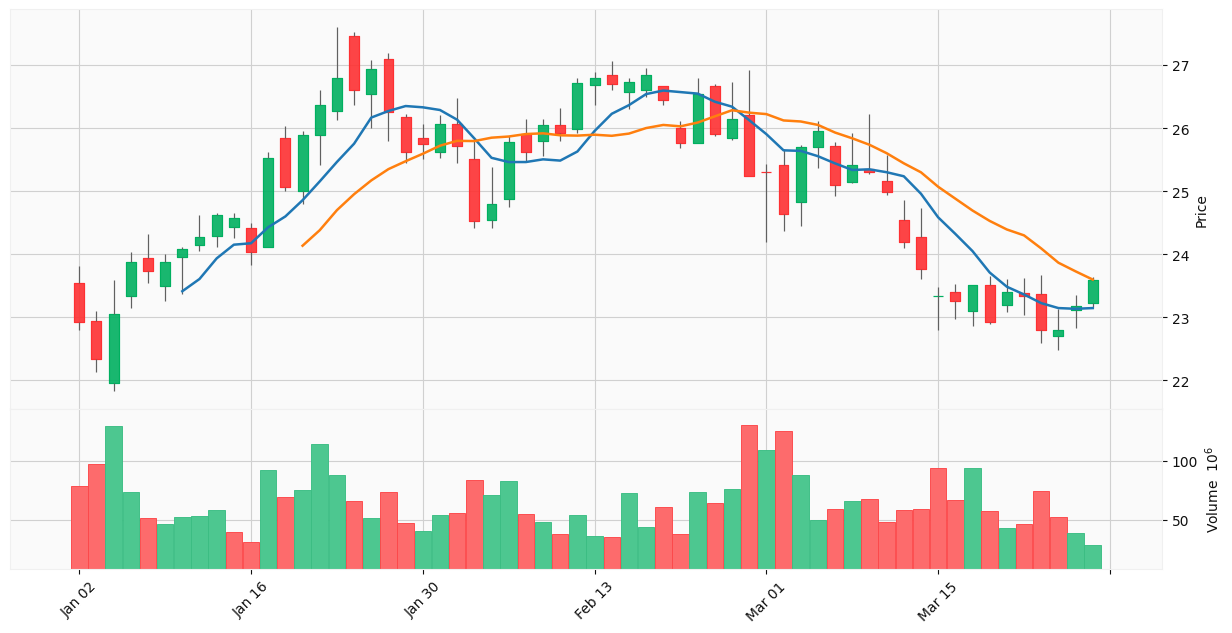

In [ ]:
# o mpl finance é uma API baseada no matplotlib para visualização de dados financeiros
mpf.plot(dados.head(60), type='candle', figsize = (16,8), volume=True, mav=(7,14), style = 'yahoo')

## Desafio

In [ ]:
# Gerar gráficos de ações da Apple com o mpl finance
#AAPL
apple = yf.download('AAPL', start='2023-01-01', end='2023-12-31')
apple.head(10)

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-03,130.279999,130.899994,124.169998,125.070000,124.216301,112117500
2023-01-04,126.889999,128.660004,125.080002,126.360001,125.497498,89113600
2023-01-05,127.129997,127.769997,124.760002,125.019997,124.166641,80962700
2023-01-06,126.010002,130.289993,124.889999,129.619995,128.735229,87754700
2023-01-09,130.470001,133.410004,129.889999,130.149994,129.261612,70790800
2023-01-10,130.259995,131.259995,128.119995,130.729996,129.837677,63896200
2023-01-11,131.250000,133.509995,130.460007,133.490005,132.578842,69458900
2023-01-12,133.880005,134.259995,131.440002,133.410004,132.499390,71379600
2023-01-13,132.029999,134.919998,131.660004,134.759995,133.840164,57809700


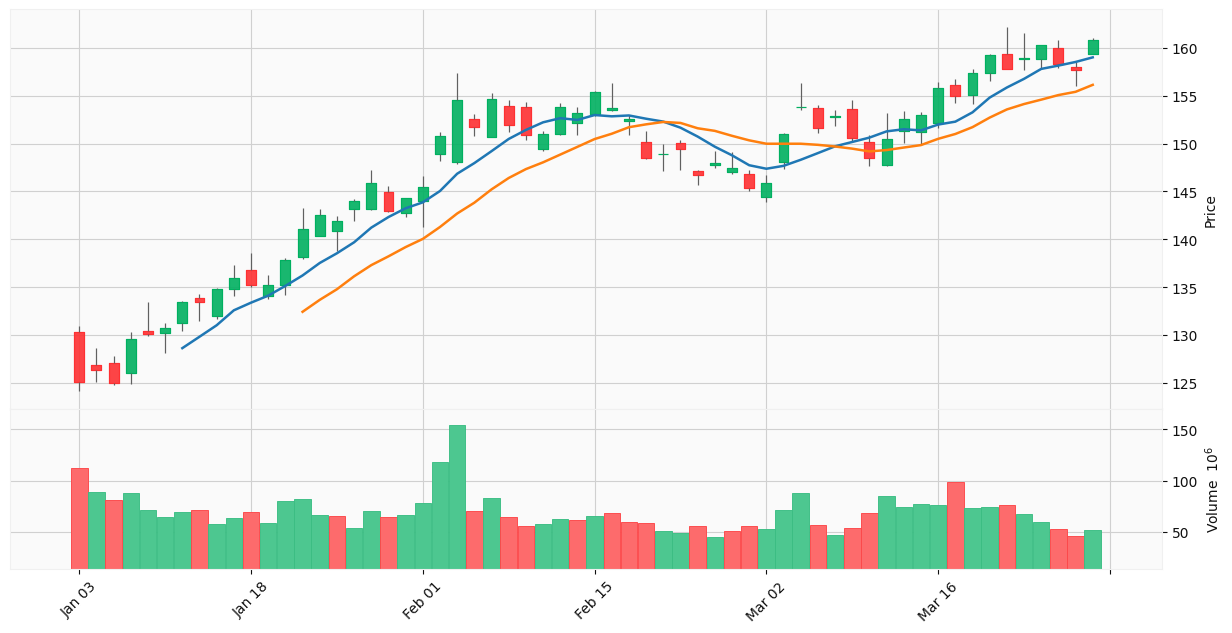

In [ ]:
mpf.plot(apple.head(60), type='candle', figsize = (16,8), volume=True, mav=(7,14), style = 'yahoo')